### For the "Hello PCA !" exercise we will use a classic Iris flower data set introduced by Sir R. A. Fisher, one of the most influential statisticians in the last century. 

### To download the Iris dataset: 
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

### You can read more about the data set :

https://en.wikipedia.org/wiki/Iris_flower_data_set

### You can read more about Sir R. A. Fisher: 

https://en.wikipedia.org/wiki/Ronald_Fisher

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import numpy as np

In [3]:
# read iris data set into a pandas dataframe
iris = pd.read_csv(filepath_or_buffer='iris_data.txt', header=None, sep=',')
iris.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris.dropna(how="all", inplace=True) # drops the empty lines if any

print 'The dimension of the dataset is ' + str(iris.shape[0]) + ' rows and ' + str(iris.shape[1]) + ' columns\n'

iris.head()

The dimension of the dataset is 150 rows and 5 columns



,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### The dataset consists of 50 samples from each of three species of Iris: Iris setosa, Iris virginica and Iris versicolor.

In [5]:
# split data table into data X and class labels y
X = iris.ix[:,0:4].values
y = iris.ix[:,4].values

from sklearn.preprocessing import StandardScaler

# normalize each feature onto a unit scale mean = 0 and variance = 1
X_norm = StandardScaler().fit_transform(X)

### Covariance Matrics of X can be constructed this way: 
### $\frac{1}{1-n}(\textbf{X}^\top - \bf{\bar{x}})(\textbf{X}^\top - \bf{\bar{x}})$

In [6]:
# construct a covariance matrix
mean_vec = np.mean(X_norm, axis=0)
X_cov = (X_norm - mean_vec).T.dot((X_norm - mean_vec)) / (X_norm.shape[0]-1)

print('Covariance matrix \n\n%s' %X_cov)

Covariance matrix 

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


You can also use the numpy covariance method 

In [7]:
X_cov = np.cov(X_norm.T)

print('Covariance Matrix \n\n%s' %X_cov)

Covariance Matrix 

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Now we find the eigenvectors and eigenvalues of the Covariance Matrix of X


In [8]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

print('Eigenvectors \n\n%s' %eig_vecs)
print('\nEigenvalues \n\n%s' %eig_vals)

Eigenvectors 

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 

[ 2.93035378  0.92740362  0.14834223  0.02074601]


### Remind us with SVD:  $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$
### For PCA: 

$\mathbf{X}\mathbf{X}^T = \mathbf{W}\mathbf{D}\mathbf{W}^T$

$\mathbf{X}\mathbf{X}^T = (\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T)(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T)^T = \mathbf{U}\mathbf{\Sigma}^2\mathbf{U}^T = \mathbf{W}\mathbf{D}\mathbf{W}^T$


In [14]:
w,s,wt = np.linalg.svd(X_cov.T)

print 'W Matrix: \n\n%s' %w
print '\nSingular values: \n\n%s' %s


W Matrix: 

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

Singular values: 

[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:

2.93035377559
0.927403621517
0.148342226482
0.0207460139956


### Visualize the % of the variance in data explained by each component.

In [19]:
plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

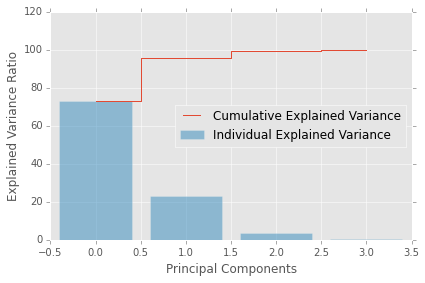

In [26]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label ='Individual Explained Variance')
    plt.step(range(4), cum_var_exp, where='mid', label ='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

### Looks like we only need the first 2 components to explain the most of the variance (95%) in the data. Next we can project the original feature matrix to the subspace spanned by the first two PCs. 

In [21]:
# select the first two PCs to construct a new projection matrix
p = np.hstack((eig_pairs[0][1].reshape(4,1),
              eig_pairs[1][1].reshape(4,1)))

print'Matrix P:\n\n', p

Matrix P:

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [22]:
# Now we multiply X with P
Y = X_norm.dot(p)

/Users/vmartins/miniconda/envs/data-science/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


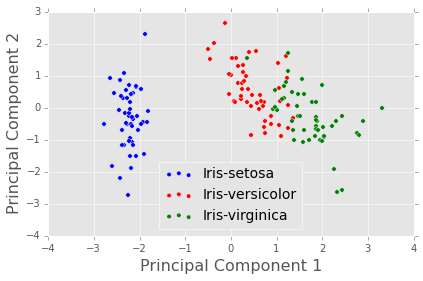

In [24]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1').set_fontsize(16)
    plt.ylabel('Principal Component 2').set_fontsize(16)
    plt.legend(loc='lower center', fontsize = 14)
    plt.tight_layout()
    plt.show()

### Looks pretty good. Three different species separate pretty well by 2 PCs. You can skip all the trouble and just use sklearn :)


In [27]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_norm)

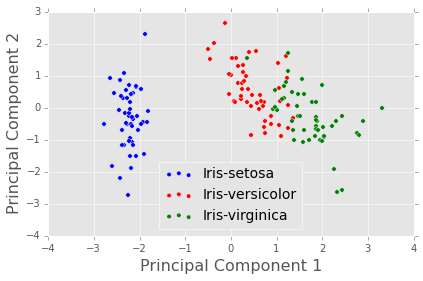

In [29]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1').set_fontsize(16)
    plt.ylabel('Principal Component 2').set_fontsize(16)
    plt.legend(loc='lower center', fontsize = 14)
    plt.tight_layout()
    plt.show()

### We didn't need all 4 features to distinguish these 3 species. We only needed 2! Isn't that awesome?! 
### Your turn! Try out a dataset of your own interest!